In [ ]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from scipy.sparse import diags
import scipy
import scipy.optimize
np.random.seed(0)

In [ ]:
from oracles import QuadraticOracle
from optimization import gradient_descent

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']

Тут мы считаем число итераций

In [ ]:
def iterations_number(n, k):
  diag = np.hstack([np.array([1, k]), np.random.uniform(1, k, n-2)])
  A = scipy.sparse.diags(diag)
  b = np.random.normal(0, 5, n)
  oracle = QuadraticOracle(A, b)
  history = gradient_descent(oracle, np.random.uniform(0, 50, n), trace=True, display=False)[2]
  return len(history['time'])

Для каждого фиксированного $n$ мы по 4 раза считаем $T(n,k)$. Потом к каждому элементу массива $K$ применяем нашу функцию, которая считает число итераций. Получится массив $T$ такой, что $T[i]$ --- число итераций, необходимых для сходимости при $K[i]$ и зафиксированном $n$.

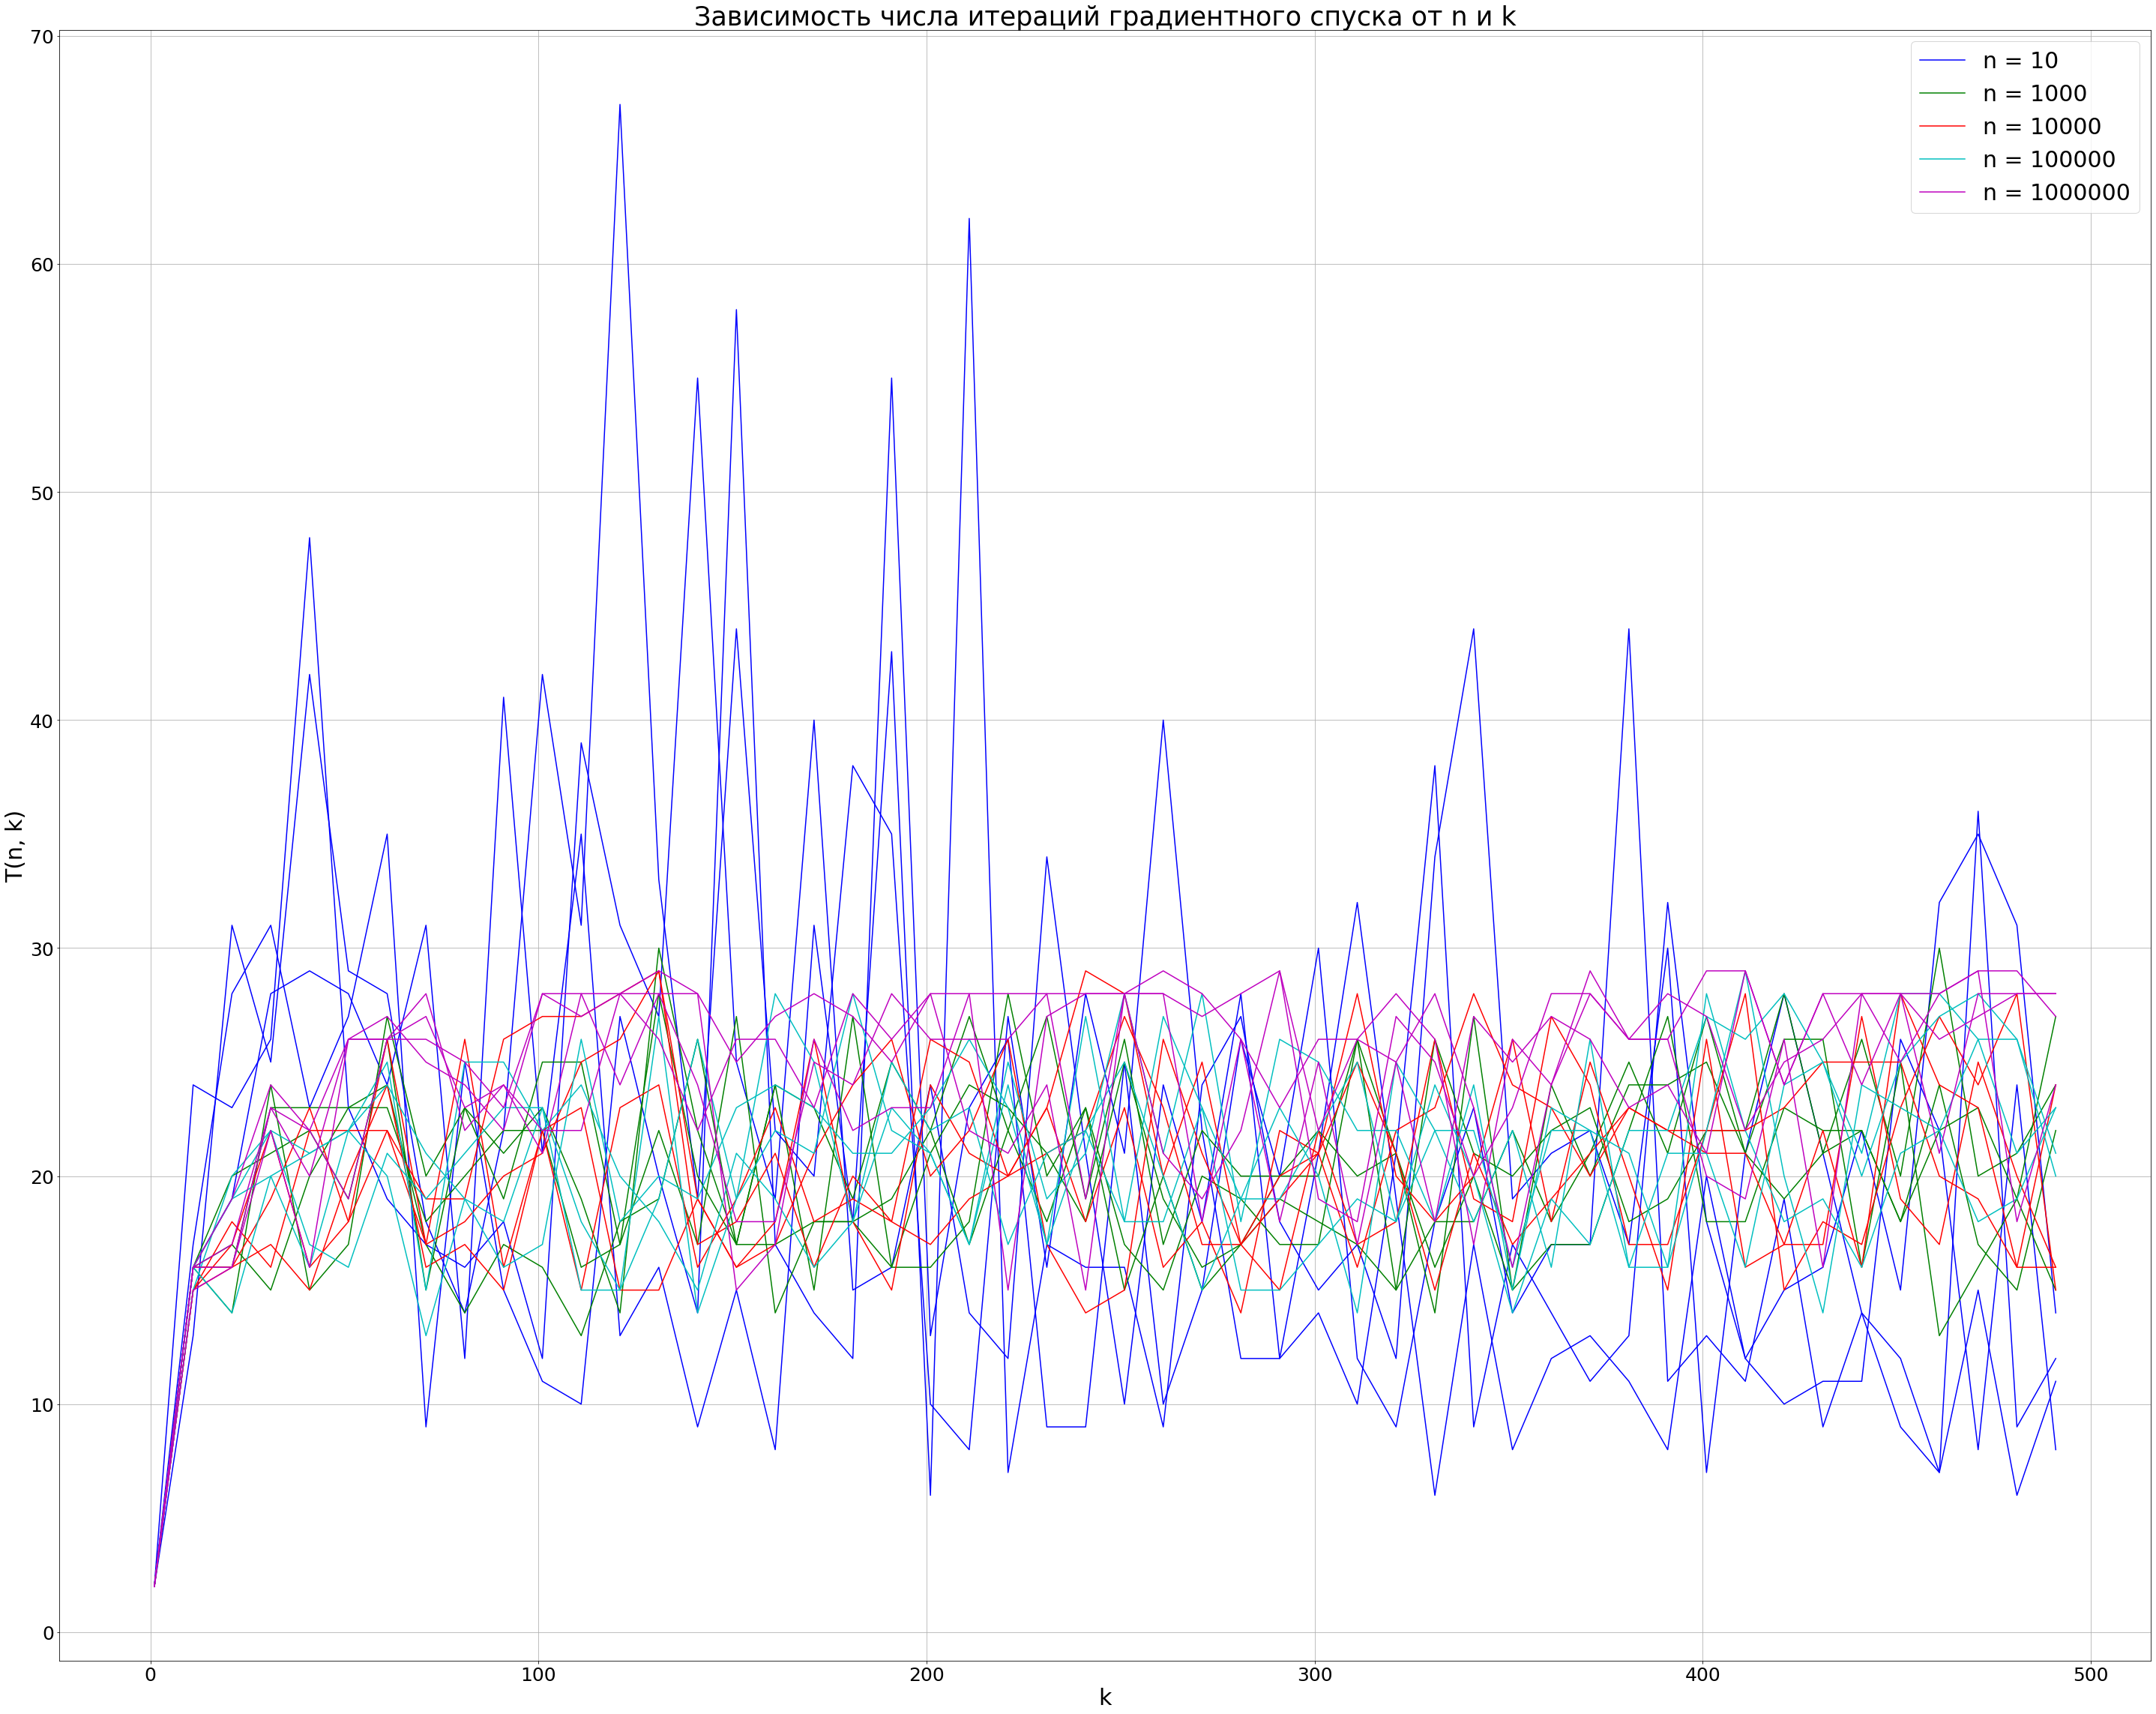

In [ ]:
n_iters = [10, 1000, 10000, 100000, 1000000]
K = np.arange(1, 500, 10)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (50, 40)
plt.xlabel('k', fontsize=30)
plt.ylabel('T(n, k)', fontsize=30)
plt.title('Зависимость числа итераций градиентного спуска от n и k', fontsize=35)
array = []

for i, n in enumerate(n_iters):
  for _ in range(4):
    T_func = np.vectorize(iterations_number)
    T = T_func(n, K)
    line1, = plt.plot(K, T, label=f'n = {n}', color = colors[i])
  array.append(line1)

ax.legend(handles=array, fancybox=True, fontsize = 30)
plt.tick_params(labelsize = 25)
ax.grid()
plt.savefig('2exp.png')